In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,  StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
dataf_train = pd.read_csv("/content/DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv")

In [21]:
print(dataf_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB
None


In [33]:
dataf_train.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


<ipython-input-34-86bd993cfc46>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_10, x='Sourcing Cost', y='ProductType', inner='stick', palette='Dark2')


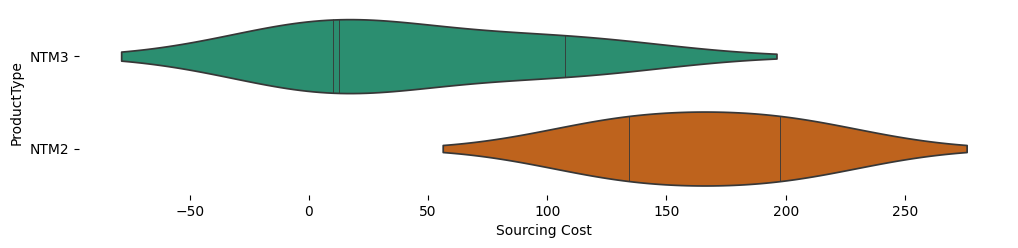

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['ProductType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='Sourcing Cost', y='ProductType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-35-56334ad3de3f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_13, x='Sourcing Cost', y='Sourcing Channel', inner='stick', palette='Dark2')


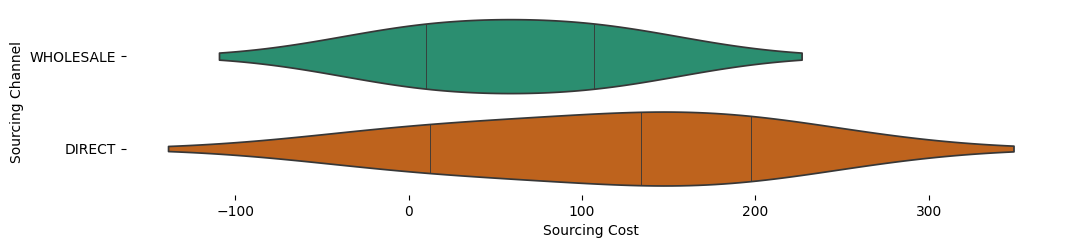

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Sourcing Channel'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Sourcing Cost', y='Sourcing Channel', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

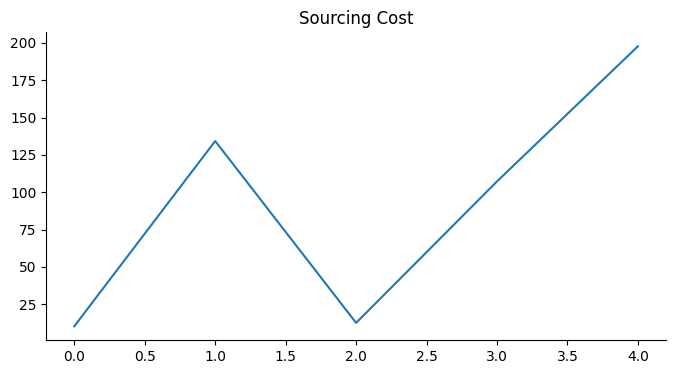

In [36]:
from matplotlib import pyplot as plt
_df_5['Sourcing Cost'].plot(kind='line', figsize=(8, 4), title='Sourcing Cost')
plt.gca().spines[['top', 'right']].set_visible(False)

In [23]:
print(dataf_train.isnull().sum())

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


In [24]:
df_train = dataf_train.drop(columns=['Month of Sourcing'])

In [25]:
label_encoder = LabelEncoder()

In [26]:
categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']

for col in categorical_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])

In [27]:
X_train = df_train.drop(columns=['Sourcing Cost'])
y_train = df_train['Sourcing Cost']

In [30]:
dataf_test = pd.read_csv("/content/DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv")

In [31]:
print(dataf_test.isnull().sum())

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


In [32]:
dataf_test.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42


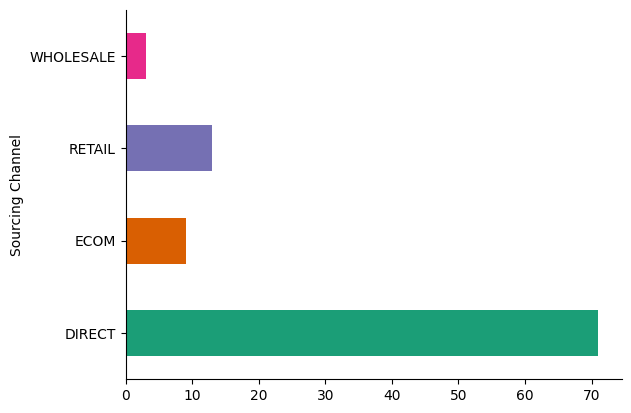

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
dataf_test.groupby('Sourcing Channel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

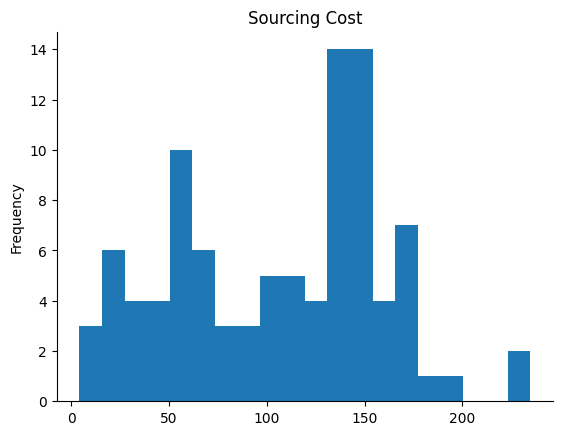

In [37]:
from matplotlib import pyplot as plt
dataf_test['Sourcing Cost'].plot(kind='hist', bins=20, title='Sourcing Cost')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [39]:
df_test = dataf_test.drop(columns=['Month of Sourcing'])

In [40]:
for col in categorical_cols:
    df_test[col] = label_encoder.fit_transform(df_test[col])

In [41]:
X_test = df_test.drop(columns=['Sourcing Cost'])
y_test = df_test['Sourcing Cost']

##LINEAR REGRESSION

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 2162.019213373084
Mean Absolute Error (MAE): 36.19249286772049
R^2 Score: 0.203076811011068


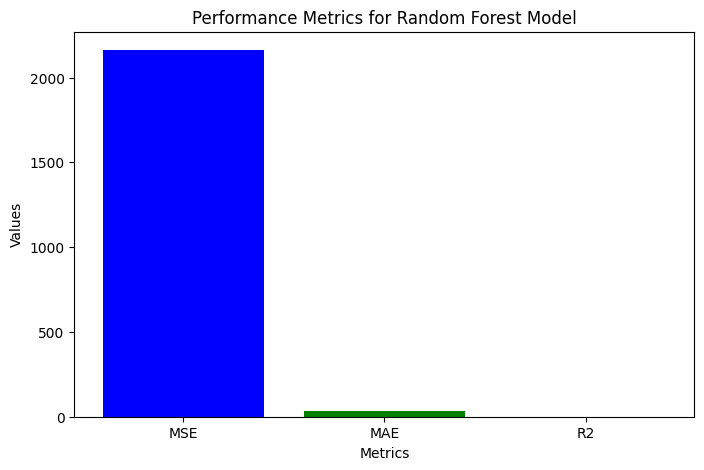

In [64]:
# Create a bar plot
metrics = ['MSE', 'MAE', 'R2']
values = [mse, mae, r2]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Random Forest Model')
plt.show()

##POLYNOMIAL REGRESSION

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
# Define the degree of the polynomial
degree = 2  # You can adjust this value

In [48]:
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [49]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [50]:
y_train_pred = model.predict(X_train_poly)

In [51]:
y_test_pred = model.predict(X_test_poly)


In [52]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

In [53]:
print("Train MSE:", train_error)
print("Test MSE:", test_error)

Train MSE: 9088.275119409924
Test MSE: 2063.9269334535943


##RANDOM FOREST

In [56]:
rf_model = RandomForestRegressor(n_estimators=150, random_state=49)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [57]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [58]:
print("Random Forest Regression Evaluation:")
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R^2 Score:", r2_rf)

Random Forest Regression Evaluation:
Mean Squared Error (MSE): 1491.2495486088565
Mean Absolute Error (MAE): 20.12567565053889
R^2 Score: 0.4503234113254849


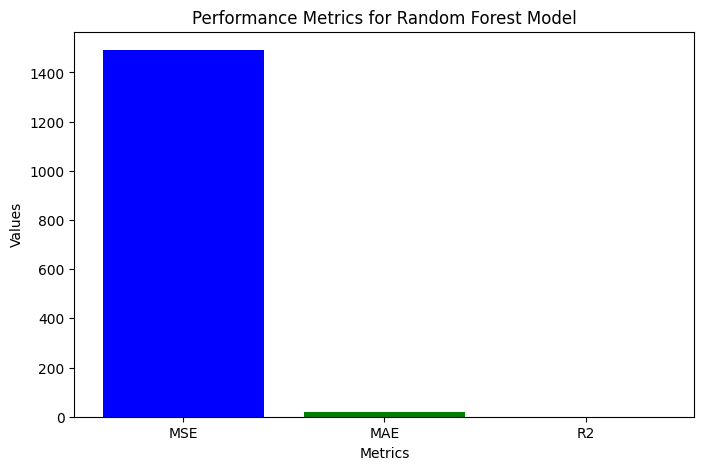

In [63]:
# Create a bar plot
metrics = ['MSE', 'MAE', 'R2']
values = [mse_rf, mae_rf, r2_rf]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Random Forest Model')
plt.show()

##LASSO

In [61]:
from sklearn.linear_model import Lasso
alpha = 0.1  # Regularization strength
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)
y_test_pred = lasso_regressor.predict(X_test)



In [62]:
# Make predictions on the training set
y_train_pred = lasso_regressor.predict(X_train)

# Make predictions on the testing set
y_test_pred = lasso_regressor.predict(X_test)

# Calculate mean squared error
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_error)
print("Test MSE:", test_error)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train MSE: 9896.571386772894
Test MSE: 2155.148974023463
Train R-squared: 0.0918303522979177
Test R-squared: 0.2056091904727081


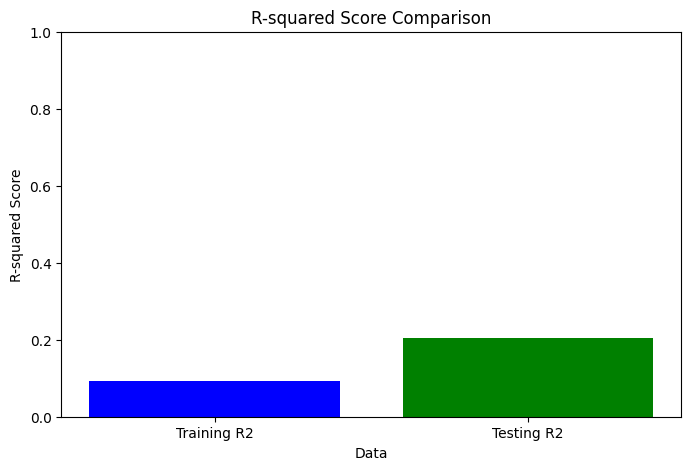

In [65]:
labels = ['Training R2', 'Testing R2']
values = [train_r2, test_r2]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green'])
plt.xlabel('Data')
plt.ylabel('R-squared Score')
plt.title('R-squared Score Comparison')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for R-squared score
plt.show()

## Model Comparison

Let's compare the following models theoretically: Linear Regression, Polynomial Regression, Random Forest, and Lasso Regression.

### Linear Regression:
- Assumes a linear relationship between the independent and dependent variables.
- Simple and interpretable.
- May underperform when the relationship between variables is nonlinear.
- Sensitive to outliers and multicollinearity.

### Polynomial Regression:
- Extends linear regression by fitting a polynomial equation to the data.
- Can capture nonlinear relationships better than linear regression.
- Prone to overfitting, especially with higher-degree polynomials.

### Random Forest:
- Ensemble learning method that builds multiple decision trees during training and outputs the mean prediction of the individual trees.
- Captures complex nonlinear relationships and interactions between variables.
- Robust to overfitting due to the averaging of predictions from multiple trees.
- Automatically handles feature selection and works well with both numerical and categorical data.

### Lasso Regression:
- Linear model with L1 regularization, adding a penalty term based on the absolute value of coefficients.
- Performs variable selection and regularization, useful for high-dimensional datasets.
- Tends to produce sparse models by shrinking some coefficients to zero, effectively performing feature selection.
- May not capture complex nonlinear relationships as effectively as Random Forest.

### Justification for Random Forest's High R-squared Score:
- Excels in capturing complex nonlinear relationships and interactions between variables.
- Less prone to overfitting compared to high-degree polynomial regression.
- Can handle feature interactions and automatically select relevant features.
- Ensemble nature allows it to generalize well to unseen data, leading to potentially higher predictive performance compared to individual models.

In summary, Random Forest's superior performance in capturing complex nonlinear relationships, handling interactions, and robustness to overfitting likely contributed to its highest R-squared score among the compared models.
